<div align="center">
<img src="images/netflix_logo.png" width="600"/>
</div>

# **Keeping Netflix on Top** 
### *Analyzing User Reviews to Prevent Customer Churn & Attract New Subscribers*

- **Author**: Mohammad Abou-Ghazala
- **Date**: 17 March, 2025

# Introduction
### Current State of Streaming
Though Netflix has long dominated the OTT market ("Over-the-Top", refering to the method of delivering content over the internet), the landscape of streaming services has drastically changed over the last few years, and with it, the challenges that Netflix faces. One of the most formidable of these challenges is the entry of legacy media companies, such as Disney and NBCUniversal, into the OTT market, as they are able to [leverage their deep content libraries to attract subscribers to their own services](https://www.filmtake.com/streaming/chasing-netflix-how-the-major-media-companies-stack-up-in-subscribers-revenue-and-challenges-part-one/). 

According to [*Whip Media's 2023 US Streaming Satisfaction Survey*](https://whipmedia.com/wp-content/uploads/2023/09/2023-US-Streaming-Satisfaction-Study.pdf), there is persistent weakening trend among platform leaders, as Netflix "continues to decline in most measurements of satisfaction, while still holding on to the top rankings in the categories of user experience and programming recommendations." 

A [2023 piece by *Variety*](https://variety.com/lists/user-friendly-streaming-services-survey/) surveying 40 Hollywood insiders about their experience using the numerous streaming platforms available to the public, or more specifically, "the way consumers interact with an app or website before, during and after they watch that content", found that "Netflix was most widely regarded as having the best UI [User Interface], with several comments about how intuitive and aesthetically pleasing the platform is." Another strength of Netflix's is its sophisticated recommendation system, sometimes refered to as "digital nudging", [which plays an important role in minimizing customer churn](https://journals.sagepub.com/doi/10.1177/20438869241296895?icid=int.sj-full-text.citing-articles.1&utm_source=chatgpt.com).

Another aspect that gives Netflix a competitive advantage over other streaming platforms is the state of its [global reach, as it currently operates in more than 190 countries](https://canvasbusinessmodel.com/blogs/competitors/netflix-competitive-landscape#:~:text=Global%20Reach:%20Netflix%20operates%20in,content%2C%20known%20as%20Netflix%20Originals.).

While other streaming services can leverage content exclusivity to attract subscribers, Netflix's library is not as deep or expansive, at least for the time being. However, Netflix's technical superiorty in UI and digital nudging gives it an indispensible competitive edge against its competitors, and must continually adjust its platforms and respond to the faults which can drive away consumers and subscribers. 

# Business Understanding

Considering Netflix's strength and drawbacks discussed above, we want to understand which aspects of our platform resonate positively with consumers, so that we have a better idea of how to go about marketing our product in relevant ways and attract new subscribers, as well as gaining deeper knowledge about which aspects of our product can be developed further to deepen our consumers' appreciation and prevent customer churn. We are tasked with addressing this very issue: *locating trends among negative user reviews so that we can adjust our product and continue to provide a top-tier streaming service that stands above the rest in technical terms, as well as trends among positive reviews so we can better understand which aspects of our product are best emphasized in our future marketing campaigns*. 

We will particularly pay close attention to reviews produced over the past year or so, to ensure that our interventions are timely and relevant to the issues faced by our clientele in the currrent moment or very recent past. Focusing on recent reviews also provides clarity of action, as there is little point in us locating trends among negative reviews from a few years back that had already been addressed in the time since, for example. 

Put another way, we seek to gain a better understanding of the following:
1. **Subscriber Retention**, and why some users are unhappy with Netflix and may cancel their subscriptions.
2. **Marketing Insights**, and identify what it is that people currently appreciate about Netflix so it can inform our promotions.

What this requires of us is:
1. To build a **binary classification model** that can deploy Natural Language Processing (NLP), or more specifically, **Sentiment Analysis** on the user reviews, and use that insight to predict whether the review is positive or negative. This can be done through traditional supervised learning models, such as Logistic Regression, Random Forest Classifiers, SVM, etc.
2. Apply **Latent Dirichlet Allocation**, or `LDA`, to both groups of positive and negative reviews to identify trends and themes that will inform the actions we take.

In this way, we will be better equipped to provide solid business recommendations regarding subscriber retention as well as more effective marketing campaigns.

# Data Understanding

The [dataset we will be working with](https://www.kaggle.com/datasets/ashishkumarak/netflix-reviews-playstore-daily-updated?resource=download) was pulled from Kaggle and contains more than 129,000 reviews dating back to 2018, which is 7 years as of the time of  writing. This dataset is updated daily, and the data contained within it is up-to-date as of 2 March, 2025.

Of the 8 columns contained in this dataset, the following are of particular or potential interest to us, pending further investigation:
1. `content`, which contains the text of the user review. We will use this column for our NLP and Sentiment Analysis.
2. `# score`, which contains a discrete (categorical) numeric rating on a scale of 1-5. This will serve as our Target column whose Labels we will predict based on the the text of the user reviews.
3. `# thumbsUpCount`, which tells us how many 'thumbs up' each user review received from other reviews, potentially indicating the relative significance of different reviews since a higher count of thumbs up would indicate the review resonated with other users.
4. `at`, telling us the date the user review was created. We will be looking to filter our data so that we can focus on reviews produced over the past year 1-2 years, or since 2023.

### Features 
We will use the text contained within the `content` column to produce features for our classifier by vectorizing the text using **Term Frequency-Inverse Document Frequency (TF-IDF)**, which is a useful strategy for determing the relative significance of terms used in the user reviews by weighing the frequency of their appearances within a review against their relative rarity across all reviews in consideration. 

### Targets
The `# score` column will be used as our Target column by combining the low ratings (1 and 2) as a Negative class and combining the positive reviews (4 and 5) as a Positive class, and turning these classes into binaries: 0 for Negative, 1 for Positive.

We will be disregarding the ratings of 3 as we want a clear understanding of what makes a review strictly negative vs. strictly positive, and a middle of the road review of 3, as insightful as its content may be, would hinder our ability to understand the division of these sentiments.

### Class Distribution
Fortunately for us, the distribution of our Negative and Positive classes are relatively balanced, with a slight skew towards Negative.
- Negative: 61%
- Positive: 39%

### Success Metrics
In order to evaluate the performance of our models, we will be using the **F1 Score**, which is the harmonic mean between the rates of False Negatives and False Positives generated by our models. It will additionally be useful in this case since False Negatives are not necessarily more detrimental to our purposes than False Positives. Due to the slight class imbalance described above, this score would be more useful than a more general Accuracy score.

## Data Preparation

### Cleaning the Dataset

Before we can begin modeling, we need to clean and prepare our dataset. This will require the following:
1. Removing null values.
2. Removing unnecessary columns.
3. Narrowing the dataset so it contains user reviews from 2023 onwards.
4. Fixing spelling errors in `content` column.
5. Consolidating the values within the Target column (`# score`) so they are binary.

In [1]:
# importing relevant libraries

import joblib
from joblib import Parallel, delayed
import re
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
random.seed(42)
np.random.seed(42)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.decomposition import LatentDirichletAllocation

from symspellpy import SymSpell, Verbosity

import lightgbm as lgb

import importlib.resources
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('stopwords', quiet=True)

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.simplefilter("ignore", UserWarning)

**NOTE**
For reproducibility's sake, we have prepared cells below to be uncommented depending on whether this notebook is being ran locally or through Google Colab. 

In [2]:
# if running this notebook in Google Colab, uncomment and run this cell

#!git clone https://github.com/momopajamas/predicting_netflix_user_reviews.git
#!pip install symspellpy
#import pkg_resources
#nltk.download('punkt_tab')


###### for convenience, the tuned models that are used later in the notebook and saved in advance,
###### and below is their paths to be loaded automatically

#TUNED_MNB_PATH = '/content/predicting_netflix_user_reviews/tuned_models/tuned_mnb.pkl'
#TUNED_LOGREG_PATH = '/content/predicting_netflix_user_reviews/tuned_models/tuned_logreg.pkl'
#TUNED_LGBM_PATH = '/content/predicting_netflix_user_reviews/tuned_models/tuned_lgbm.pkl'

In [3]:
# if running locally (not on Google Colab), uncomment and run this cell


###### for convenience, the tuned models that are used later in the notebook and saved in advance,
###### and below is their paths to be loaded automatically

#TUNED_MNB_PATH = 'tuned_models/tuned_mnb.pkl'
#TUNED_LOGREG_PATH = 'tuned_models/tuned_logreg.pkl'
#TUNED_LGBM_PATH = 'tuned_models/tuned_lgbm.pkl'

In [4]:
# loading in the dataset

df = pd.read_csv('data/netflix_reviews.csv')

df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,2487372e-d1ce-49b9-83a7-ed405a2911c1,QueenyTech,"Trash, it made me change my password because I...",1,0,5.1.2 build 17106,2025-03-01 14:50:57,5.1.2 build 17106
1,7f278d2c-00fe-4295-9f5b-43ccdb370e79,Paresh Dalbehera (PD),I love Netflix only ❤️,5,0,9.4.1 build 4 62196,2025-03-01 14:46:52,9.4.1 build 4 62196
2,42664618-3fe5-4128-af69-5012e69f4a54,Reta Ali,it's the best but pls bring back the society s...,5,0,9.3.0 build 4 62124,2025-03-01 14:28:59,9.3.0 build 4 62124
3,93b3ec35-7931-4441-9920-35547c6f1584,Jogre,"When you fold your Galaxy Fold 6, it forces Ne...",2,0,9.4.1 build 4 62196,2025-03-01 14:21:10,9.4.1 build 4 62196
4,96cbd996-c5d5-4e23-b011-6799254ac039,Auralia Rorke,Good,4,0,9.4.1 build 4 62196,2025-03-01 14:12:16,9.4.1 build 4 62196


In [5]:
# removing unnecessary columns

df_clean = df.drop(
    ['reviewId', 'userName', 'reviewCreatedVersion', 'appVersion'], 
    axis=1
)

df_clean.head()

,content,score,thumbsUpCount,at
0,"Trash, it made me change my password because I...",1,0,2025-03-01 14:50:57
1,I love Netflix only ❤️,5,0,2025-03-01 14:46:52
2,it's the best but pls bring back the society s...,5,0,2025-03-01 14:28:59
3,"When you fold your Galaxy Fold 6, it forces Ne...",2,0,2025-03-01 14:21:10
4,Good,4,0,2025-03-01 14:12:16


In [6]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130426 entries, 0 to 130425
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   content        130421 non-null  object
 1   score          130426 non-null  int64 
 2   thumbsUpCount  130426 non-null  int64 
 3   at             130426 non-null  object
dtypes: int64(2), object(2)
memory usage: 4.0+ MB


In [7]:
# checking for null values

df_clean.isna().sum()

content          5
score            0
thumbsUpCount    0
at               0
dtype: int64

In [8]:
df_clean[df_clean['content'].isna()]

,content,score,thumbsUpCount,at
6592,NaN,3,0,2025-01-03 11:50:11
10224,NaN,5,0,2024-12-02 02:54:46
11661,NaN,5,0,2024-11-10 03:49:25
20742,NaN,5,0,2024-05-21 16:56:29
21093,NaN,2,0,2024-05-19 13:52:42


In [9]:
# dropping rows with null values

df_clean = df_clean.dropna()

df_clean.isna().sum()

content          0
score            0
thumbsUpCount    0
at               0
dtype: int64

In [10]:
# converting the date column `at` to date-time format and removing the time stamps

df_clean['at'] = pd.to_datetime(df_clean['at']).dt.date

df_clean.head()

,content,score,thumbsUpCount,at
0,"Trash, it made me change my password because I...",1,0,2025-03-01
1,I love Netflix only ❤️,5,0,2025-03-01
2,it's the best but pls bring back the society s...,5,0,2025-03-01
3,"When you fold your Galaxy Fold 6, it forces Ne...",2,0,2025-03-01
4,Good,4,0,2025-03-01


In [11]:
# filtering out entries prior to 2023

df_clean = df_clean[df_clean['at'] >= pd.to_datetime('2023-01-01').date()]

In [12]:
df_clean['at'].value_counts()

at
2024-05-17    353
2024-05-09    291
2024-05-12    217
2024-05-27    202
2024-05-25    194
             ... 
2024-08-24      1
2024-09-16      1
2024-09-15      1
2024-08-31      1
2024-09-04      1
Name: count, Length: 725, dtype: int64

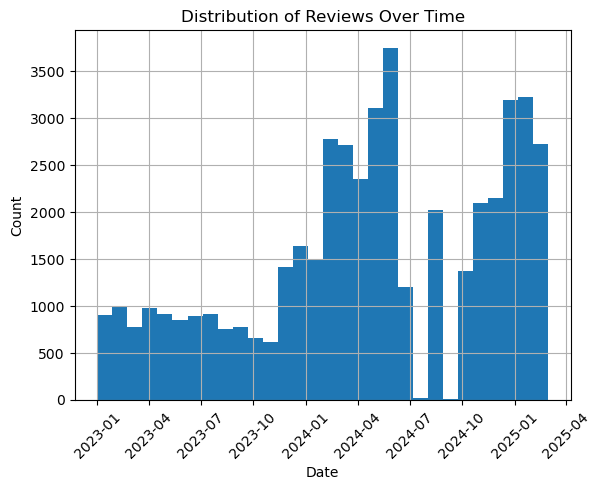

In [13]:
# looking at distribution of reviews over time

df_clean['at'].hist(bins=30) 
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Distribution of Reviews Over Time')
plt.xticks(rotation=45)
plt.savefig('images/review_distribution.png', dpi=300, bbox_inches='tight')  # saving as an image
plt.show()

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47309 entries, 0 to 130419
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        47309 non-null  object
 1   score          47309 non-null  int64 
 2   thumbsUpCount  47309 non-null  int64 
 3   at             47309 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.8+ MB


### Fixing Spelling Errors in `content` Column

In [15]:
# fixing spelling errors in reviews

# initializing SymSpell
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)

# loading dictionary for spell checking
dict_path = importlib.resources.files("symspellpy") / "frequency_dictionary_en_82_765.txt"


def correct_spelling(text):
    """
    Creating a function that:
    1) ensure input is string
    2) splits and batches text for checking with SymSpell
    """
    if isinstance(text, str):  
        words = text.split()
        corrected_words = [
            sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=2)[0].term
            if sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=2)
            else word
            for word in words
        ]
        return ' '.join(corrected_words)
    return ''

# applying function in parallel for quicker processing
df_clean['content'] = Parallel(n_jobs=-1)(
    delayed(correct_spelling)(text) for text in df_clean['content']
)

In [16]:
# looking at distribution of rating score column
df_clean['score'].value_counts()

score
1    22982
5    13740
2     3833
3     3391
4     3363
Name: count, dtype: int64

In [17]:
# dropping the neutral rating scores of 3

df_clean = df_clean[df_clean['score'] != 3]

# converting the rest of the rating scores to binary for negative (0) and positive (1)

df_clean['score'] = df_clean['score'].map({
    1: 0, 2:0, # negative scores
    4:1, 5:1   # positive scores
})

df_clean['score']

0         0
1         1
2         1
3         0
4         1
         ..
130404    1
130410    0
130415    0
130417    0
130419    1
Name: score, Length: 43918, dtype: int64

In [18]:
# checking the distribution of the `score` column

print(df_clean.score.value_counts(normalize=True) * 100)

score
0    61.05697
1    38.94303
Name: proportion, dtype: float64


### Feature Engineering
#### Factoring in Thumbs Up Count

The data contained in the `thumbsUpCount` column can help us determine relative significance of different user reviews: reviews with high thumbs up counts are probably more significant than reviews with 0 thumbs ups.

Since the distribution of this column's values are all over the place, we will need to scale this column to ensure proper weight is given to reviews with more thumbs up without allowing outliers to dominate our models' performances. 

Since our column is heavily skewed to the right (disproportionate number of reviews with 0 thumbs up, with a few reviews having a high number of thumbs up) we will use **log transformation** to normalize this column in a way that does not overstate extreme outliers. Specifically, we will use **log1p()** to handle the large number of 0 counts.

This will allow us to use a scaled thumbs up count as an additional Feature in our modeling.

In [19]:
# looking at distribution of ThumbsUp column

print(df_clean["thumbsUpCount"].value_counts())
print()
print(df_clean["thumbsUpCount"].describe())


thumbsUpCount
0      33541
1       4714
2       1651
3        886
4        494
       ...  
204        1
444        1
845        1
637        1
171        1
Name: count, Length: 447, dtype: int64

count    43918.000000
mean         7.170591
std         87.109358
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4502.000000
Name: thumbsUpCount, dtype: float64


In [20]:
# creating new column with log-scaled thumbs up counts

df_clean['thumbs_up_log'] = np.log1p(df_clean['thumbsUpCount']) # using log1p() to handle the 0s appropriately

df_clean['thumbs_up_log'].value_counts()

thumbs_up_log
0.000000    33541
0.693147     4714
1.098612     1651
1.386294      886
1.609438      494
            ...  
5.323010        1
6.098074        1
6.740519        1
6.458338        1
5.147494        1
Name: count, Length: 447, dtype: int64

In [21]:
df_clean.head()

,content,score,thumbsUpCount,at,thumbs_up_log
0,"Trash, it made me change my password because I...",0,0,2025-03-01,0.0
1,I love Netflix only ❤️,1,0,2025-03-01,0.0
2,it's the best but pls bring back the society s...,1,0,2025-03-01,0.0
3,"When you fold your Galaxy Fold 6, it forces Ne...",0,0,2025-03-01,0.0
4,Good,1,0,2025-03-01,0.0


In [22]:
# saving the cleaned dataset for later visualizations in Tableau

df_clean.to_csv('data/netflix_reviews_clean.csv', index=False)  

### Train-Test Split

Now that we are done cleaning our dataset, we need to assign our X and y variable. Then, we will split our data into separate sets for training our models, validating our model paramater tuning, and performing tests to evaluate our models' capabilities.

In [23]:
# assigning X and y variables

X = df_clean[['content', 'thumbs_up_log']]

y = df_clean['score']

# splitting test and training datasets

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    random_state = 42
)

# splitting training and validation datasets

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    test_size = 0.2,
    random_state = 42
)

### Creating Custom Transformers

With our training, validation and test sets ready, we will create custom transformers to preprocess our text data for it to be useable in our models. 

This custom transformer, `TextPreprocessor`, will lowercase the text, remove special characters, tokenize the text, remove stop words, and lemmatize the text.  

In [24]:
class TextPreprocessor(BaseEstimator, TransformerMixin):
    """
    Preprocesses text by:
    1) Lowercasing the text
    2) Removing non-alphabetic characters
    3) Tokenizing the text
    4) Removing stopwords
    5) Lemmatizing the tokens
    """

    def __init__(self):
        self._lemmatizer = WordNetLemmatizer()
        self._stop_words = set(stopwords.words('english'))

    def fit(self, X, y=None):
        return self  

    def transform(self, X):
        preprocessed_text = []

        for text in X:
            if not isinstance(text, str):  # ensure input is a string
                text = str(text)
            text = text.lower()  # lowercase
            text = re.sub(r'[^a-z\s]', '', text)  # remove special characters
            tokens = nltk.word_tokenize(text)  # tokenize
            filtered_tokens = [word for word in tokens if word not in self._stop_words]  # remove stopwords
            lemmatized_tokens = [self._lemmatizer.lemmatize(word) for word in filtered_tokens]  # lemmatize
            preprocessed_text.append(' '.join(lemmatized_tokens))  # join tokens back into a string
        
        return preprocessed_text


### Pipelines

We will prepare Pipelines to ensure systematic preprocessing and prevent data leakage.

These Pipelines will include two main steps:
1. `ColumnTransformer` that will run our TextPreprocessor on our text, vectorize that text for TF-IDF, and combine these vectors with our `thumbs_up_log` column to be run in the model.
2. `Classifier` which will run our models.

In [25]:
# creating a pipeline for Column Transformer

column_transformer = ColumnTransformer([
    ('text_features', Pipeline([
        ('preprocessor', TextPreprocessor()),  
        ('vectorizer', TfidfVectorizer()),
        ('variance_threshold', VarianceThreshold(threshold=0))  # remove constant features that don't add anything
    ]), 'content'),  
    
    ('thumbs_up', 'passthrough', ['thumbs_up_log'])  
])

In [26]:
# creating baseline Multinomial Naive Bayes pipeline with `feature_pipeline` as first step

mnb_baseline = MultinomialNB(
    class_prior=[0.39, 0.61] # countering class imbalance
)

baseline_pipeline = Pipeline([
    ('transformer', column_transformer),
    ('classifier', mnb_baseline)
])

In [27]:
# creating vanilla Logistic Regression model pipeline 

logreg_vanilla = LogisticRegression(
    random_state=42,
    class_weight='balanced' # accounting for class imbalance
)

logreg_pipeline = Pipeline([
    ('transformer', column_transformer),
    ('classifier', logreg_vanilla)
])

In [28]:
# creating LightGBM model pipeline

lgbm_vanilla = lgb.LGBMClassifier(
    objective='binary',
    metric='binary_logloss',
    scale_pos_weight=61/39, # accounting for class imbalance
    verbose=-1 # suppressing logs
)

lgbm_pipeline = Pipeline([
    ('transformer', column_transformer),
    ('classifier', lgbm_vanilla)
])

# Modeling

In [29]:
# creating function to store model results
model_results = []

def store_results(model_name, f1):
    """
    Store metrics for all our models
    """

    model_results.append({
        'Model': model_name,
        'F1': f"{f1 * 100:.2f}%"  # format as percentage with 2 decimal places
    })

    # convert to dataframe
    global model_results_df
    model_results_df = pd.DataFrame(model_results)

In [30]:
baseline_pipeline.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('text_features',
                                                  Pipeline(steps=[('preprocessor',
                                                                   TextPreprocessor()),
                                                                  ('vectorizer',
                                                                   TfidfVectorizer()),
                                                                  ('variance_threshold',
                                                                   VarianceThreshold(threshold=0))]),
                                                  'content'),
                                                 ('thumbs_up', 'passthrough',
                                                  ['thumbs_up_log'])])),
                ('classifier', MultinomialNB(class_prior=[0.39, 0.61]))])

In [31]:
y_val_pred = baseline_pipeline.predict(X_val)

baseline_f1 = f1_score(y_val, y_val_pred)

baseline_f1

0.8336380255941499

In [32]:
store_results('BaselineMNB', baseline_f1)

In [33]:
logreg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('text_features',
                                                  Pipeline(steps=[('preprocessor',
                                                                   TextPreprocessor()),
                                                                  ('vectorizer',
                                                                   TfidfVectorizer()),
                                                                  ('variance_threshold',
                                                                   VarianceThreshold(threshold=0))]),
                                                  'content'),
                                                 ('thumbs_up', 'passthrough',
                                                  ['thumbs_up_log'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', random_state=42))])

In [34]:
y_val_pred_lr = logreg_pipeline.predict(X_val)

logreg_vanilla_f1 = f1_score(y_val, y_val_pred_lr)

logreg_vanilla_f1

0.858697623798295

In [35]:
store_results('LogReg Vanilla', logreg_vanilla_f1)

In [36]:
lgbm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('text_features',
                                                  Pipeline(steps=[('preprocessor',
                                                                   TextPreprocessor()),
                                                                  ('vectorizer',
                                                                   TfidfVectorizer()),
                                                                  ('variance_threshold',
                                                                   VarianceThreshold(threshold=0))]),
                                                  'content'),
                                                 ('thumbs_up', 'passthrough',
                                                  ['thumbs_up_log'])])),
                ('classifier',
                 LGBMClassifier(metric='binary_logloss', objective='binary',
                                scale_pos_weight=1.564102564102564,
                                verbose=-1))])

In [37]:
y_val_pred_lgbm = lgbm_pipeline.predict(X_val)

lgbm_vanilla_f1 = f1_score(y_val, y_val_pred_lgbm)

lgbm_vanilla_f1

0.8437057991513437

In [38]:
store_results('LightGBM Vanilla', lgbm_vanilla_f1)

In [39]:
model_results

[{'Model': 'BaselineMNB', 'F1': '83.36%'},
 {'Model': 'LogReg Vanilla', 'F1': '85.87%'},
 {'Model': 'LightGBM Vanilla', 'F1': '84.37%'}]

All of our vanilla models performed well, with scores between 83-86%. The vanilla LogReg was the best.

## Tuning Hyperparameters

While our results from our initial modeling are good, let's see if we can boost their performance by tuning hyperparameters. We will deploy `GridSearchCV` to find the most apt arrangement of parameters for each model.

While our focus is on tuning the parameters for each model to optimize performance, we will also be tuning parameters for the vectorizer, notably in introducing **bigrams and trigrams**, which essentially represent word pairings of two or three words as the added context can be helpful as opposed to considering each word in isolation.

*For convenience, we have saved the tuned models using `joblib` for easy loading and to save time when this notebook is run in the future.*

In [40]:
# MultinomialNB Grid Search

param_mnb = {
    'transformer__text_features__vectorizer__ngram_range': [(1,1), (1,2), (1,3)],  # unigrams, bigrams, trigrams
    'transformer__text_features__vectorizer__min_df': [1, 2, 5],  # ignore rare words appearing in few documents
    'transformer__text_features__vectorizer__max_df': [0.8, 0.9, 1.0],  # Ignore very frequent words
    'transformer__text_features__vectorizer__smooth_idf': [True, False],  # Whether to smooth IDF weights
    'classifier__alpha': [0.1, 0.5, 1.0, 2.0]  # MNB alpha values
}


In [41]:
# no need for this cell since model has been saved and loaded above

#random_mnb = RandomizedSearchCV( 
    #baseline_pipeline,
    #param_mnb,
    #n_iter=20,  
    #cv=3,  
    #scoring='f1',  
#)

#random_mnb.fit(X_train, y_train)

In [42]:
# saving tuned MultinomialNB model for convenience

#joblib.dump(random_mnb.best_estimator_, 'tuned_mnb.pkl')

In [43]:
# loading tuned MultinomialNB model
# this model's path should have already been loaded earlier in the notebook

tuned_mnb = joblib.load(TUNED_MNB_PATH)

In [44]:
# fitting loaded MultinomialNB model on training data
tuned_mnb.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('text_features',
                                                  Pipeline(steps=[('preprocessor',
                                                                   TextPreprocessor()),
                                                                  ('vectorizer',
                                                                   TfidfVectorizer(ngram_range=(1,
                                                                                                2)))]),
                                                  'content'),
                                                 ('thumbs_up', 'passthrough',
                                                  ['thumbs_up_log'])])),
                ('classifier',
                 MultinomialNB(alpha=0.1, class_prior=[0.39, 0.61]))])

In [45]:
# Logistic Regression Grid Search

param_logreg = {
    'transformer__text_features__vectorizer__ngram_range': [(1,1), (1,2), (1,3)],  
    'transformer__text_features__vectorizer__min_df': [1, 2, 5],  
    'transformer__text_features__vectorizer__max_df': [0.8, 0.9, 1.0],  
    'transformer__text_features__vectorizer__smooth_idf': [True, False],  
    'classifier__C': [0.01, 0.1, 1.0, 10.0, 100.0],  # strength of regularization
    'classifier__penalty': ['l2'],  # L2 regularization 
    'classifier__solver': ['lbfgs']  # efficient solver for larger datasets
}

In [46]:
# no need for this cell since model has been saved and loaded above

#random_logreg = RandomizedSearchCV(
    #logreg_pipeline,
    #param_logreg,
    #n_iter=20,  
    #cv=3,  
    #scoring='f1'  
#)

#random_logreg.fit(X_train, y_train)

In [47]:
# saving tuned LogReg model

#joblib.dump(random_logreg.best_estimator_, 'tuned_logreg.pkl')

In [48]:
# loading tuned LogReg model
# this model's path should have already been loaded earlier in the notebook

tuned_logreg = joblib.load(TUNED_LOGREG_PATH)

In [49]:
# fitting tuned model on training data
tuned_logreg.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('text_features',
                                                  Pipeline(steps=[('preprocessor',
                                                                   TextPreprocessor()),
                                                                  ('vectorizer',
                                                                   TfidfVectorizer(min_df=5,
                                                                                   ngram_range=(1,
                                                                                                3),
                                                                                   smooth_idf=False))]),
                                                  'content'),
                                                 ('thumbs_up', 'passthrough',
                                                  ['thumbs_up_log'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', random_state=42))])

In [50]:
# LightGBM Grid Search

param_lgbm = {
    'transformer__text_features__vectorizer__ngram_range': [(1,1), (1,2), (1,3)],  
    'transformer__text_features__vectorizer__min_df': [1, 2, 5],  
    'transformer__text_features__vectorizer__max_df': [0.8, 0.9, 1.0],  
    'transformer__text_features__vectorizer__smooth_idf': [True, False], 
    'classifier__num_leaves': [31, 50],  # number of leaves in one tree
    'classifier__learning_rate': [0.01, 0.05],  # learning rate
    'classifier__n_estimators': [100, 200]  # number of trees
}

In [51]:
# no need for this cell since model has been saved and loaded above

#random_lgbm = RandomizedSearchCV(
    #lgbm_pipeline,
    #param_lgbm,
    #n_iter=20,  
    #cv=3,  
    #scoring='f1',
    #verbose=0 # suppressing logs for readability
#)

#random_lgbm.fit(X_train, y_train)

In [52]:
# saving tuned LGBM model

#joblib.dump(random_lgbm.best_estimator_, 'tuned_lgbm.pkl')

In [53]:
# loading tuned LGBM model
# this model's path should have already been loaded earlier in the notebook

tuned_lgbm = joblib.load(TUNED_LGBM_PATH)

In [54]:
# fitting tuned LGBM model on training data
tuned_lgbm.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('text_features',
                                                  Pipeline(steps=[('preprocessor',
                                                                   TextPreprocessor()),
                                                                  ('vectorizer',
                                                                   TfidfVectorizer(max_df=0.9,
                                                                                   min_df=2,
                                                                                   ngram_range=(1,
                                                                                                2),
                                                                                   smooth_idf=False))]),
                                                  'content'),
                                                 ('thumbs_up', 'passthrough',
                                                  ['thumbs_up_log'])])),
                ('classifier',
                 LGBMClassifier(learning_rate=0.05, metric='binary_logloss',
                                n_estimators=200, num_leaves=50,
                                objective='binary',
                                scale_pos_weight=1.564102564102564,
                                verbose=-1))])

### Checking Model Performance on Validation Data

In [55]:
y_val_pred_mnb_tuned = tuned_mnb.predict(X_val)

tuned_mnb_f1 = f1_score(y_val, y_val_pred_mnb_tuned)

In [56]:
y_val_pred_logreg_tuned = tuned_logreg.predict(X_val)

tuned_logreg_f1 = f1_score(y_val, y_val_pred_logreg_tuned)

In [57]:
y_val_pred_lgbm_tuned = tuned_lgbm.predict(X_val)

tuned_lgbm_f1 = f1_score(y_val, y_val_pred_lgbm_tuned)

In [58]:
# storing the model results
store_results('MNB Tuned', tuned_mnb_f1)
store_results('LogReg Tuned', tuned_logreg_f1)
store_results('LGBM Tuned', tuned_lgbm_f1)

model_results_df

,Model,F1
0,BaselineMNB,83.36%
1,LogReg Vanilla,85.87%
2,LightGBM Vanilla,84.37%
3,MNB Tuned,84.70%
4,LogReg Tuned,86.03%
5,LGBM Tuned,84.79%


### Testing Tuned Models

Our tuned models performed very well on the validation data, as seen above. with the tuned Logistic Regression model receiving an **86% F1 score**. Though this is only slightly better than the untuned model, this is only because the untuned model performed well in the first place, wiht 85.87%, which indicates that our hyperparameter tuning did not do too much to improve the model technically, though perhaps we've started to hit a ceiling on what can be done with the tools before us. 

Later in this notebook, we will take a closer look at the terms contained within the reviews to see if any limitations are contained, such as foreign languages, etc.

Now, we will test these tuned models on our holdout dataset below.

In [59]:
y_test_pred_tuned_mnb = tuned_mnb.predict(X_test)
y_test_pred_tuned_logreg = tuned_logreg.predict(X_test)
y_test_pred_tuned_lgbm = tuned_lgbm.predict(X_test)

tuned_mnb_test_f1 = f1_score(y_test, y_test_pred_tuned_mnb)
tuned_logreg_test_f1 = f1_score(y_test, y_test_pred_tuned_logreg)
tuned_lgbm_test_f1 = f1_score(y_test, y_test_pred_tuned_lgbm)

In [60]:
test_results = {
    'Model': ['MNB Tuned', 'LogReg Tuned', 'LGBM Tuned'],
    'Test F1': [tuned_mnb_test_f1, 
                tuned_logreg_test_f1, 
                tuned_lgbm_test_f1]  
}

test_results_df = pd.DataFrame(test_results)
test_results_df['Test F1'] = test_results_df['Test F1'].apply(lambda x: f"{x*100:.2f}%")

# merging the old `model_results_df` with the new `test_results_df` on 'Model'
final_results_df = pd.merge(model_results_df, test_results_df, on='Model')

final_results_df

,Model,F1,Test F1
0,MNB Tuned,84.70%,84.27%
1,LogReg Tuned,86.03%,85.75%
2,LGBM Tuned,84.79%,84.09%


In [61]:
# creating new dataframe with % sign dropped and values converted to float for plotting
test_results_float = final_results_df[['Model', 'F1', 'Test F1']]
test_results_float[['F1', 'Test F1']] = test_results_float[['F1', 'Test F1']].replace('%', '', regex=True).astype(float)

# setting 'Model" column as index
test_results_float.set_index('Model', inplace=True) 

test_results_float

,F1,Test F1
Model,,
MNB Tuned,84.70,84.27
LogReg Tuned,86.03,85.75
LGBM Tuned,84.79,84.09


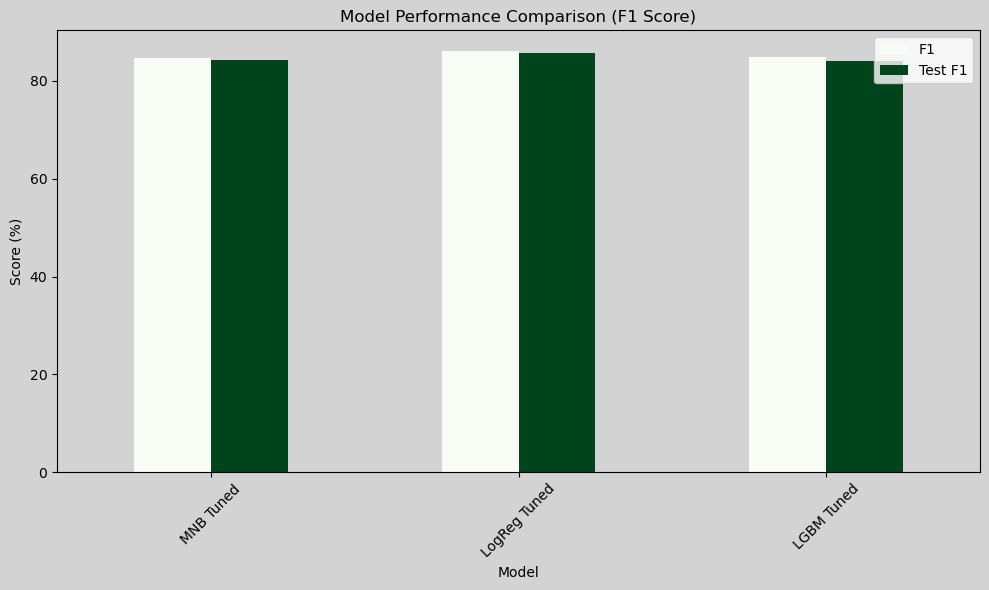

In [62]:
# plotting test results bar chart
ax = test_results_float.plot(kind='bar', figsize=(10, 6), cmap='Greens', rot=45)

# Change the background color to gray
plt.gcf().set_facecolor('lightgray')
ax.set_facecolor('lightgray')

plt.title('Model Performance Comparison (F1 Score)')
plt.xlabel('Model')
plt.ylabel('Score (%)')
plt.tight_layout()

plt.savefig("images/final_results_barchart.png", dpi=300, bbox_inches='tight')

plt.show();

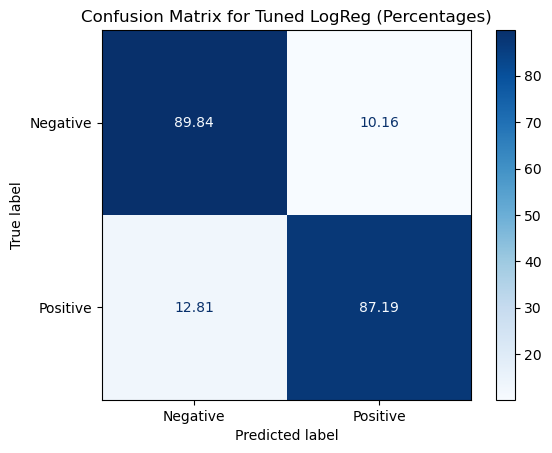

In [63]:
cm = confusion_matrix(y_test, y_test_pred_tuned_logreg)
cm_percent = cm.astype('float') / cm.sum(axis=1, keepdims=True) * 100  # converting to percentages

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_percent, display_labels=['Negative', 'Positive'])
cm_display.plot(cmap=plt.cm.Blues, values_format=".2f")  # format to 2 decimal places
plt.savefig('images/confusion_matrix.png', dpi=300, bbox_inches='tight')  # saving the image
plt.title('Confusion Matrix for Tuned LogReg (Percentages)')
plt.show()

## `LDA`: Sorting Reviews by Topics

Now that we are done with our models, let's sort our data to see if we can learn of any trends or themes across the reviews.

For this, we will be using **Latent Dirichlet Allocation**, or `LDA` ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html)), which is a useful unsupervised topic modeling algorithm used to sort documents and data according to topics, and can help find hidden themes within texts.

To do this, we will:
1. Use our tuned LogReg model pipeline on the entire cleaned dataset to create a new column for predicted sentiment, `pred_sent`.
2. Extract the Positive and Negative reviews sorted by our model into separate lists.
3. Apply LDA on both the Positive and Negative sets of reviews.
4. Analyze the topics and themes generated by LDA.

**Note**: Though we used `Tfidfvectorizer` in our modeling pipelines, we will instead use `CountVectorizer` for our LDA sorting, as it works better as a vectorizer for LDA since it keeps raw word counts and LDA assumes word counts follow a distribution.

In [64]:
# applying the trained LogReg model pipeline to predict sentiment
df_clean['pred_sent'] = tuned_logreg.predict(df_clean[['content', 'thumbs_up_log']])

# splitting the classified reviews into Positive and Negative reviews
pos_rev = df_clean[df_clean['pred_sent'] == 1]
neg_rev = df_clean[df_clean['pred_sent'] == 0]

In [65]:
# creating custom list of neutral reoccuring words
neutral_words = {"netflix", "watch", "app", "movie", "subscription", "account", 
                 "device", "service", "tv", "screen", "streaming", "plan"}

# creating two LDA pipelines: one for Positive, one for Negative
pos_lda_pipeline = Pipeline([
    ('preprocessor', TextPreprocessor()),  # Preprocessing
    ('vectorizer', CountVectorizer(stop_words=list(ENGLISH_STOP_WORDS.union(neutral_words)), # removing neutral words
                             ngram_range=(1,2), max_df=0.9, min_df=5, max_features=10000)),  
    ('lda', LatentDirichletAllocation(n_components=5, random_state=42))  # LDA Topic Modeling
])

neg_lda_pipeline = Pipeline([
    ('preprocessor', TextPreprocessor()),  
    ('vectorizer', CountVectorizer(stop_words=list(ENGLISH_STOP_WORDS.union(neutral_words)), 
                             ngram_range=(1,2), max_df=0.9, min_df=5, max_features=10000)),  
    ('lda', LatentDirichletAllocation(n_components=5, random_state=42))  
])

# applying the LDA pipeline on positive and negative reviews
pos_topics = pos_lda_pipeline.fit_transform(pos_rev['content'])
neg_topics = neg_lda_pipeline.fit_transform(neg_rev['content'])

In [66]:
# top words for Positive and Negative reviews
pos_terms = pos_lda_pipeline.named_steps['vectorizer'].get_feature_names_out()
neg_terms = neg_lda_pipeline.named_steps['vectorizer'].get_feature_names_out()

n_top_words = 25  # number of words per topic

# 🔵 Positive Reviews Topics
print("🔵 Positive Review Topics:")
for topic_idx, topic in enumerate(pos_lda_pipeline.named_steps['lda'].components_):
    print(f"Topic {topic_idx}:")
    print(", ".join([pos_terms[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

# 🔴 Negative Reviews Topics
print("🔴 Negative Review Topics:")
for topic_idx, topic in enumerate(neg_lda_pipeline.named_steps['lda'].components_):
    print(f"Topic {topic_idx}:")
    print(", ".join([neg_terms[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

🔵 Positive Review Topics:
Topic 0:
good, series, amazing, watching, anime, hindi, experience, really, lot, really good, english, language, dubbed, enjoy, perfect, wonderful, quality, film, web, web series, time, subtitle, thanks, star, content

Topic 1:
love, like, thing, dont, want, im, time, watching, best, know, really, series, great, wish, amazing, drama, fun, problem, ive, say, free, download, apps, favourite, year

Topic 2:
nice, excellent, cool, work, ok, super, option, phone, love, yes, favorite, fantastic, watching, star, speed, interesting, aap, friendly, hi, using, fine, satisfied, quality, absolutely, user

Topic 3:
great, like, season, add, awesome, really, thank, new, game, dont, episode, series, need, im, happy, think, want, anime, make, amazing, star, got, problem, bring, ad

Topic 4:
best, easy, use, content, platform, quality, video, ott, download, better, series, add, entertainment, new, world, wow, easy use, application, option, feature, need, make, like, issue, dat

### Topic Analysis
`LDA` has provided us with 5 approximations for topics each across the Positive and Negative reviews by identifying most consistent and recurring words and grouping the reviews together acccordingly. By taking a look at the words gathered, we can go further and approximate themes and trends contained in the sentiments expressed as follows:

🔵 **Positive Reviews**

Topic 0 — *Quality & Experience*: People praise the series, anime, Hindi content, and dubbed options.

Topic 1 — *Love for Netflix*: Users express love for Netflix, favorite shows, and positive emotions.

Topic 2 — *Functionality & UI*: Positive mentions of the Netflix app being excellent, friendly, etc.

Topic 3 — *Content & Features*: Appreciation for series, episodes, games, and anime.

Topic 4 — *Usability*: Users highlight the platform, video quality, OTT experience, and entertainment.

🔴 **Negative Reviews**

Topic 0 — *Account & Password Issues*: Complaints about password sharing, login problems, and sign-in issues.
  
Topic 1 — *Pricing & Payment*: Users dislike high prices, payment issues, and ad-based subscriptions and related subscription tiers.
  
Topic 2 — *Content Availability & Quality*: Frustration with game selection, limited language options, and missing series.
  
Topic 3 — *App Performance Issues*: Frustration with bugs, crashes, playback errors, and loading issues.
  
Topic 4 — *Household & Sharing Restrictions*: Complaints regarding new password-sharing policies and related charges.

Though these are rough approximations, they indicate where we can intervene to prevent customer churn and how we can promote Netflix to gain new subscribers. Additionally, they indicate points for further investigation to flesh our strategy out in a more cohesive and in-depth way.

# Conclusion

After iterating through and testing several binary classifiers, we have successfully built a tuned Logistic Regression model capable of categorizing user review sentiment as Positive or Negative.

As a result, we were able to apply this finalized model on our entire cleaned dataset, and used our categorizations to generate topics through applying Latent Dirichlet Allocation, or `LDA`. In so doing, we were able to gain deeper insight into the reviews and can surmise action items and next steps moving forward to further deepen this line of investigation.

## Evaluation
Despite a class imbalance in our Target, we have successfully built a tuned Logistic Regression model capable of categorizing user review sentiment as Positive or Negative with a respectable **F1 score of 86%** through Feature Engineering (namely, factoring in the significance of Thumbs-Up counts for reviews) and tuning the model's hyperparameters.

This F1 score tells us that our model was successful at striking a balance between preventing both False Negatives and False Positives, which for or=ur stated purposes are equally important as we are trying to both find action items to prevent customer churn as well as find positives to promote our platform and gain new subscribers. The final model we're identified, the tuned Logistic Regression, will be capable of accurately classifying Positive and Negative reviews moving forward, making this entire workflow much easier and more succinct.

After running this model on our entire cleaned dataset, we used `LDA` to approximate themes and trends across the reviews, and found the following:

**Positive Themes: What Users Love**
1. *Content Quality & Variety* — Users appreciate Netflix’s series, anime, and dubbed content, particularly Hindi and other regional options.
2. *User Experience* – Many users find the app's usability to be easy and smooth.
3. *Favorite Features* – Users praise OTT convenience, video quality, and diverse content options.

**Negative Themes: Points for Growth**
1. *Pricing & Subscription Complaints* – Users reacted negatively to high costs, payment issues, and ad-based plans and tiers.
2. *Password Sharing Restrictions* – Related to the above point, many are frustrated with household-sharing limitations and extra charges.
3. *App Performance Issues* – Many users complained about login errors, bugs, playback problems, and other technical issues.
4. *Content Gaps* – Some users feel regional content and series availability are lacking.

## Limitations
**Neutral Reviews** — Our modeling and analysis were limited by the fact that we chose to ignore Neutral reviews, and focus only on Positive and Negative sentiments. This decision was taken to create the most competent binary classifier possible, and the impressive results speak for themselves. However, our despite our solid insights gained, we could potentially go further by factoring in sentiments that are more mixed, as many Negative and Positive feedback can be gained by considering Neutral reviews.

**Foreign Language Reviews** — In our investigation and modeling, we found a recurrence of foreign words, namely Hindi though other languages were included as well. Though this limitation did not hinder our models' abilities to classify the reviews too heavily, it did limit our ability to investigate the reviews more thoroughly, and if we were able to conduct NLP with foreign languages such as Hindi, we no doubt would have an even more robust model and analysis.
  

## Recommendations
According to the insights laid out above, we recommend the following:

#### A) Customer Retention

1. **Improving Pricing & Subscription Flexibility** —  We may be able to reduce customer churn by offering more affordable regional pricing tiers, and by improving our communication on these ends.

2. **Addressing Password-Sharing Concerns** — We should look into plans that are more family-friendly and reasonably flexible on the matter of multi-household use.

3. **Improving Communication** — Customer dissatisfaction can be mitigated by improving our communication regarding some of the recurring issues such as pricing, subscription flexibility, and password-sharing concerns, and why these measures are deemed necessary and beneficial to the user's experience. 

4. **Enhancing Performance & Stability of the App** — We should prioritize addressing technical issues such as playback errors, login issues, and loading issues, and look into implementing more effective in-app error resolution tools.

#### B) Promotion to Gain New Subscribers

1. **Expanding Regional Content** — As we seek to cement and expend our global reach, we should invest in regional series and diverse language-based content. It would be particularly strategic for us to invest in promoting popular subbed and subtitled foreign-language content more consistently and effectively.

2. **Capitalizing on Netflix's Strengths in Advertisements** — Creatively blending the following aspects in a new promotional campaign:
    - *Variety and quality of our content,* particularly regional content to expand our global reach.
  
    - *Usability and technical superiority*, especially in comparison to our competitors.

## Next Steps
These user review analysis techniques can be strengthened by **factoring in Neutral Reviews** and we recommend investing resources in developing models capable of accurately doing so.

Further, we urge the company to **expand our NLP capabilities to include other languages**, in order to more effectively and consistently respond to the praise and complaints brought by our global audience.

We should also consider **partnering with regional and foreign-language streaming platforms** like [Shahid](https://shahid.mbc.net/en) to push our global reach further.